In [22]:
import pandas as pd # Veri iÅŸleme ve analiz iÃ§in
import numpy as np # SayÄ±sal hesaplamalar iÃ§in
import seaborn as sns # GÃ¶rselleÅŸtirme iÃ§in
import matplotlib.pyplot as plt # Grafik Ã§izimleri iÃ§in

# Makine Ã¶ÄŸrenmesi modelleri
import xgboost as xgb  #XGBoost modeli
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.tree import DecisionTreeClassifier # Karar aÄŸacÄ±
from sklearn.neighbors import KNeighborsClassifier  # K-en yakÄ±n komÅŸu
from sklearn.ensemble import RandomForestClassifier  # Rastgele orman
from sklearn.linear_model import LogisticRegression  # Lojistik regresyon

# Ã–n iÅŸleme (kategorik verileri sayÄ±sal verilere dÃ¶nÃ¼ÅŸtÃ¼rmek iÃ§in ve
# Kategorik verileri sayÄ±sal verilere dÃ¶nÃ¼ÅŸtÃ¼rmek iÃ§in
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Veriyi eÄŸitim ve test olarak ayÄ±rma
from sklearn.model_selection import train_test_split

# Model deÄŸerlendirme metrikleri
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [23]:
df = pd.read_csv("heart.csv") #Veri setini okumak iÃ§in read komutu kullandÄ±k
df.head() #ilk 5 satÄ±rÄ±nÄ± gÃ¶rÃ¼ntÃ¼ler

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [24]:
(df.info()) #Veri setinin genel yapÄ±sÄ± hakkÄ±nda bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [25]:
print(df.isnull().sum()) #Eksik Veri KontrolÃ¼

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [26]:
df.dtypes #Veri setindeki her sÃ¼tunun veri tiplerini gÃ¶rÃ¼ntÃ¼ler

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [27]:
#Kategorik DeÄŸiÅŸkenler
kategorik = df.select_dtypes(include='object')

print("Kategorik deÄŸiÅŸkenler:", kategorik.columns.tolist())

Kategorik deÄŸiÅŸkenler: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [28]:
#SayÄ±sal DeÄŸiÅŸkenler
sayisal = df.select_dtypes(include='number')
print("SayÄ±sal deÄŸiÅŸkenler:", sayisal.columns.tolist())

SayÄ±sal deÄŸiÅŸkenler: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [29]:
#HeartDisease DeÄŸiÅŸkenini Label Encode Etme
#Yes' ve 'No' deÄŸerlerini 1 ve 0 olarak dÃ¶nÃ¼ÅŸtÃ¼rÃ¼yoruz
lb = LabelEncoder()  #LabelEncoder nesnesi oluÅŸturuluyor
df['HeartDisease'] = lb.fit_transform(df['HeartDisease'])  


# Kategorik Verileri Encode Etme 
df = pd.get_dummies(df, columns=kategorik.columns.drop(["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]), drop_first=True)

# SayÄ±sal Verileri Ã–lÃ§ekleme
scaler = StandardScaler() 
scaled_columns = ["Age","RestingBP","Cholesterol","FastingBS",
                  "MaxHR","Oldpeak"]
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])# SeÃ§ilen sÃ¼tunlara Ã¶lÃ§ekleme iÅŸlemi uygulanÄ±r

In [30]:
df  #BÃ¼tÃ¼n iÅŸlemeri yaptÄ±ktan sonra veri setimizi kontrol ediyoruz

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   -1.433140   M           ATA   0.410909     0.825070  -0.551341     Normal   
1   -0.478484   F           NAP   1.491752    -0.171961  -0.551341     Normal   
2   -1.751359   M           ATA  -0.129513     0.770188  -0.551341         ST   
3   -0.584556   F           ASY   0.302825     0.139040  -0.551341     Normal   
4    0.051881   M           NAP   0.951331    -0.034755  -0.551341     Normal   
..        ...  ..           ...        ...          ...        ...        ...   
913 -0.902775   M            TA  -1.210356     0.596393  -0.551341     Normal   
914  1.536902   M           ASY   0.627078    -0.053049   1.813758     Normal   
915  0.370100   M           ASY  -0.129513    -0.620168  -0.551341     Normal   
916  0.370100   F           ATA  -0.129513     0.340275  -0.551341        LVH   
917 -1.645286   M           NAP   0.302825    -0.217696  -0.551341     Normal   

        MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0    1.382928              N -0.832432       Up             0  
1    0.754157              N  0.105664     Flat             1  
2   -1.525138              N -0.832432       Up             0  
3   -1.132156              Y  0.574711     Flat             1  
4   -0.581981              N -0.832432       Up             0  
..        ...            ...       ...      ...           ...  
913 -0.188999              N  0.293283     Flat             1  
914  0.164684              N  2.357094     Flat             1  
915 -0.857069              Y  0.293283     Flat             1  
916  1.461525              N -0.832432     Flat             1  
917  1.422226              N -0.832432       Up             0  

[918 rows x 12 columns]

In [31]:
X = df.drop(columns=["HeartDisease"]) #(HeartDisease) dÄ±ÅŸÄ±ndaki tÃ¼m sÃ¼tunlar Ã¶zellik olarak seÃ§ilir
y = df['HeartDisease'] #(HeartDisease) seÃ§ilir

In [32]:
# Veriyi eÄŸitim ve test setlerine ayÄ±rma
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [33]:
reports = [] #Daha sonrasÄ±nda modelleri karÅŸÄ±laÅŸtÄ±rmak iÃ§in liste oluÅŸturduk

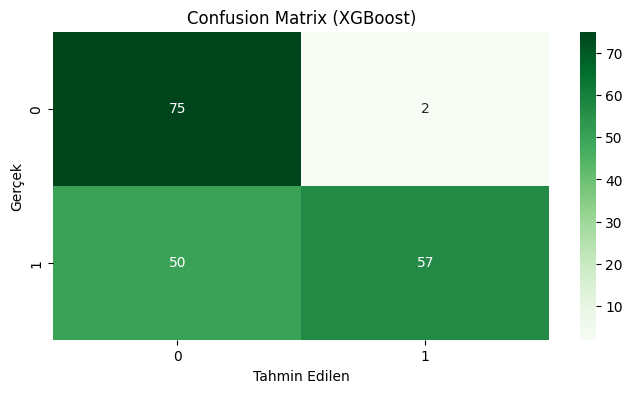

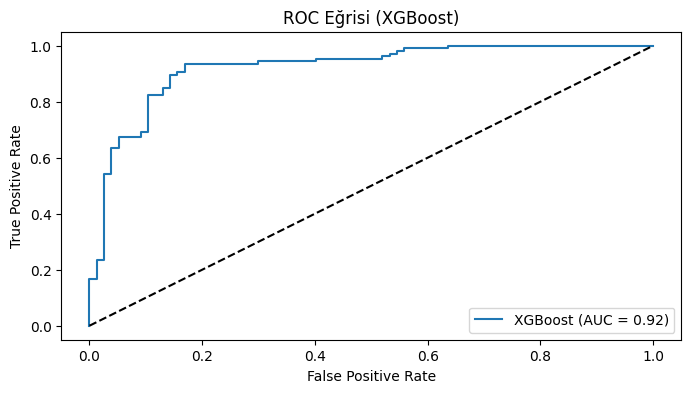

ROC AUC: 0.9211


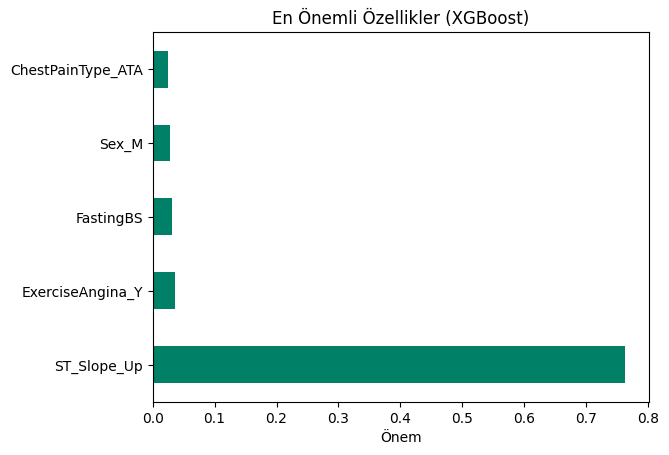

              precision    recall  f1-score   support

           0       0.60      0.97      0.74        77
           1       0.97      0.53      0.69       107

    accuracy                           0.72       184
   macro avg       0.78      0.75      0.71       184
weighted avg       0.81      0.72      0.71       184



In [34]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Ã–zellik ve hedef deÄŸiÅŸkenlerini ayÄ±rma
X=df_encoded.drop("HeartDisease", axis=1)
y=df_encoded["HeartDisease"]

# EÄŸitim ve test verisine ayÄ±rma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Sadece eÄŸitim verisine fit edilmeli

# Modelin daha doÄŸru Ã¶ÄŸrenmesini saÄŸlÄ±yoruz
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modeli eÄŸitmek, tahmin yapmak, deÄŸerlendirmek (XGBoost)

# Modeli EÄŸitme
xgb_model = xgb.XGBClassifier()  # XGBoost sÄ±nÄ±flandÄ±rÄ±cÄ± nesnesi oluÅŸturuluyor
xgb_model.fit(X_train, y_train)  # EÄŸitim verisi ile model eÄŸitiliyor

# Test Verisinde Tahmin Yapma
y_pred = xgb_model.predict(X_test_scaled) # Test verisi ile tahmin yapÄ±lÄ±yor

# DeÄŸerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)  # KarÄ±ÅŸÄ±klÄ±k matrisi hesaplanÄ±yor
# KarÄ±ÅŸÄ±klÄ±k matrisi, TP,FP,TN ve FN sonuÃ§larÄ± iÃ§erir.

classReport = classification_report(y_test, y_pred)  # SÄ±nÄ±flandÄ±rma raporu Ã§Ä±karÄ±lÄ±yor
# Precision, recall, F1 skoru ve doÄŸruluk gibi metrikleri gÃ¶sterir.

reports.append(classification_report(y_test, y_pred, output_dict=True)) 
 # SonuÃ§lar karÅŸÄ±laÅŸtÄ±rma listesine ekleniyor

y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Pozitif sÄ±nÄ±f iÃ§in olasÄ±lÄ±k deÄŸerleri alÄ±nÄ±yor
# Test verisinde her bir Ã¶rneÄŸin pozitif sÄ±nÄ±f olma olasÄ±lÄ±ÄŸ (1)hesaplanÄ±yor.

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # ROC eÄŸrisi iÃ§in gerekli metrikler hesaplanÄ±yor
# False Positive Rate ve True Positive Rate hesaplanarak ROC eÄŸrisi Ã§izilecektir.

rocScore = roc_auc_score(y_test, y_pred_prob)  # ROC AUC skoru hesaplanÄ±yor
# ROC eÄŸrisinin altÄ±ndaki alanÄ± hesaplar, yÃ¼ksek AUC skoru iyi performansÄ± gÃ¶sterir.

# Confusion Matrix Ã‡izme
plt.figure(figsize=(8,4)) # Grafik boyutunu ayarla
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens") # IsÄ± haritasÄ± Ã§iz, deÄŸerleri gÃ¶ster, tam sayÄ± formatÄ±nda, yeÅŸil tonlarÄ±nda
plt.title("Confusion Matrix (XGBoost)") # Grafik baÅŸlÄ±ÄŸÄ±
plt.xlabel("Tahmin Edilen") # X ekseni etiketi
plt.ylabel("GerÃ§ek") # Y ekseni etiketi
plt.show() # GrafiÄŸi gÃ¶ster

# ROC EÄŸrisini Ã‡izme
plt.figure(figsize=(8,4))  # Grafik boyutu 8x4 olarak ayarlanÄ±r
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {rocScore:.2f})')  
# ROC eÄŸrisi Ã§izilir ve etiket olarak AUC deÄŸeri eklenir
plt.plot([0, 1], [0, 1], 'k--')  
# Rastgele tahmin eÄŸrisini temsil eden diyagonal Ã§izilir
plt.xlabel('False Positive Rate')  # X ekseni adÄ±: YanlÄ±ÅŸ Pozitif OranÄ±
plt.ylabel('True Positive Rate')  # Y ekseni adÄ±: DoÄŸru Pozitif OranÄ±
plt.title('ROC EÄŸrisi (XGBoost)')  # Grafik baÅŸlÄ±ÄŸÄ± belirlenir
plt.legend()  # EÄŸri etiketi (AUC deÄŸeri) gÃ¶sterilir
plt.show()  # GrafiÄŸi ekrana Ã§izdir

print(f"ROC AUC: {rocScore:.4f}")  
# AUC skoru terminale yazdÄ±rÄ±lÄ±r, modelin genel baÅŸarÄ± seviyesi Ã¶zetlenir


# En Ã–nemli Ã–zellikleri Belirtme
importances = xgb_model.feature_importances_ # EÄŸitilmiÅŸ XGBoost modelinden Ã¶zellik Ã¶nem skorlarÄ±nÄ± al
features = X.columns # Orijinal veri setindeki Ã¶zellik (sÃ¼tun) isimlerini al
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False).head(5)
 # Ã–zellik Ã¶nem skorlarÄ±nÄ± bir Pandas Serisine dÃ¶nÃ¼ÅŸtÃ¼r,
 # Ã¶zellik isimleriyle eÅŸleÅŸtir, azalan sÄ±raya gÃ¶re sÄ±rala ve en Ã¶nemli ilk 10 Ã¶zelliÄŸi seÃ§
feat_importance.plot(kind='barh',cmap="summer") 
# En Ã¶nemli 5 Ã¶zelliÄŸi yatay Ã§ubuk grafik olarak Ã§iz, "summer" renk haritasÄ±nÄ± kullan
plt.title(f"En Ã–nemli Ã–zellikler (XGBoost)") # Grafik baÅŸlÄ±ÄŸÄ±nÄ± ayarla
plt.xlabel("Ã–nem") # X ekseni etiketini ayarla
plt.show() # GrafiÄŸi gÃ¶ster

#Raporu GÃ¶sterme
print(classReport) # SÄ±nÄ±flandÄ±rma raporunu (precision, recall, f1-score vb.) konsola yazdÄ±r

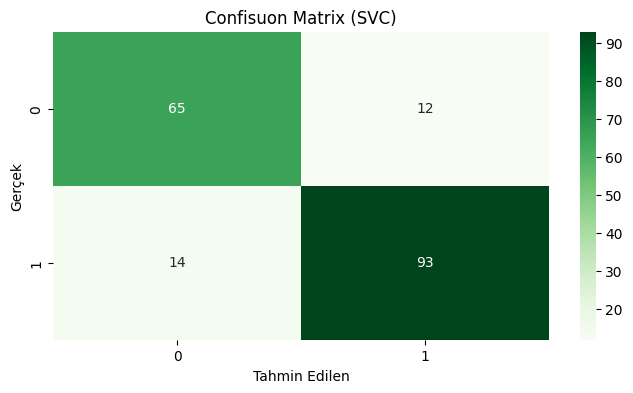

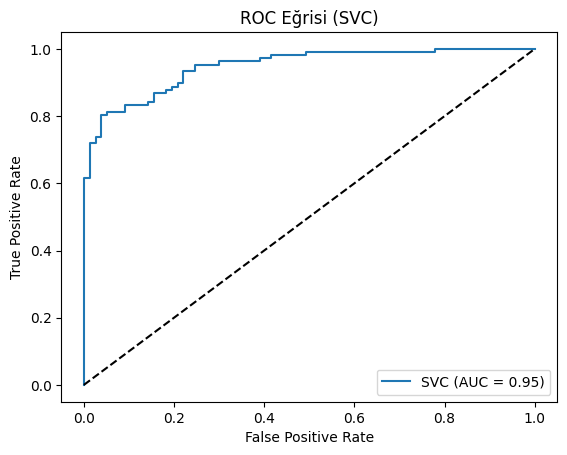

ROC AUC: 0.9472
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [35]:
#Modeli eÄŸitmek, tahmin yapmak, deÄŸerlendirmek (SVC)

# Modeli EÄŸitme
svc_model = SVC(probability=True) 
#(Support Vector Classifier) modelini oluÅŸturuyoruz 
#ve olasÄ±lÄ±k tahmini yapÄ±labilmesi iÃ§in 'probability=True' ekliyoruz.
svc_model.fit(X_train, y_train) # Modeli eÄŸitim verisiyle eÄŸitiyoruz.

# Test Verisinde Tahmin Yapma
y_pred = svc_model.predict(X_test)

# DeÄŸerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred,zero_division=True) #SÄ±nÄ±flandÄ±rma raporu
reports.append(classification_report(y_test, y_pred,zero_division=True,output_dict=True))
#raporu sÃ¶zlÃ¼k formatÄ±nda listeye ekle
y_proba = svc_model.predict_proba(X_test)[:, 1]  # Pozitif sÄ±nÄ±fÄ±n olasÄ±lÄ±klarÄ±
fpr, tpr, thresholds = roc_curve(y_test, y_proba)#roc eÄŸrisi iÃ§in gerekli olan fpr,tpr,eÅŸik deÄŸer
rocScore = roc_auc_score(y_test, y_proba) #roc auc hesaplamasÄ±

# Confusion Matrix Ã‡izme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confisuon Matrix (SVC)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("GerÃ§ek")
plt.show()

# ROC EÄŸrisini Ã‡izme
plt.plot(fpr, tpr, label=f'SVC (AUC = {rocScore:.2f})')#Roc eÄŸrisi Ã§izimi
plt.plot([0, 1], [0, 1], 'k--')# Rastgele sÄ±nÄ±flandÄ±rÄ±cÄ±ya ait referans Ã§izgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC EÄŸrisi (SVC)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}") #skoru yazdÄ±rÄ±yoruz

#Raporu GÃ¶sterme
print(classReport)

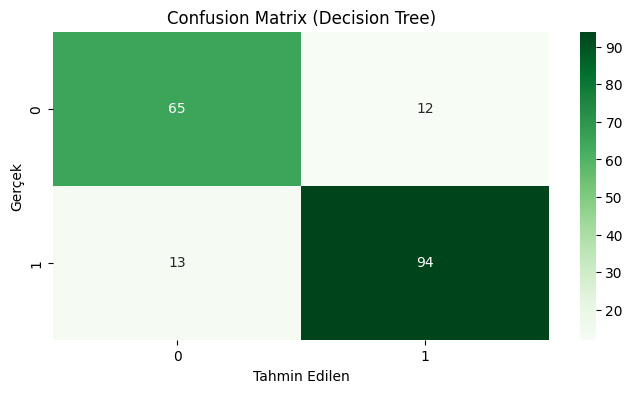

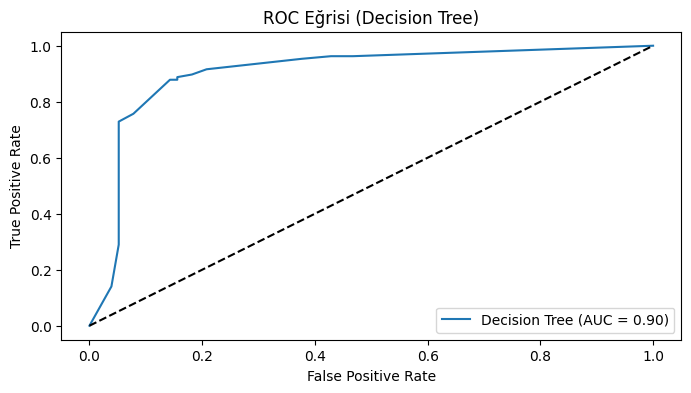

ROC AUC: 0.9036


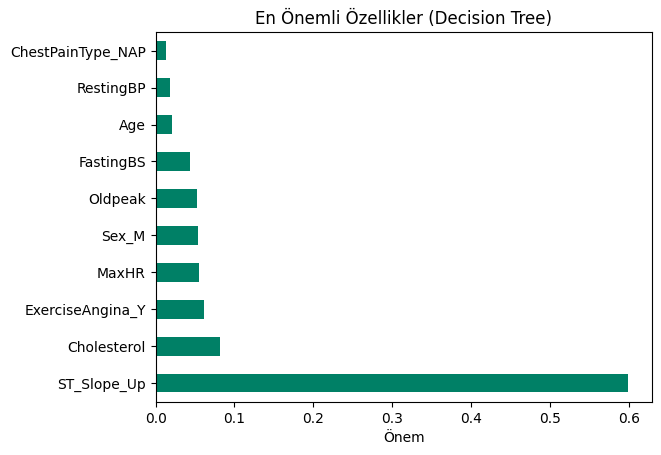

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [36]:
# Modeli eÄŸitmek, tahmin yapmak, deÄŸerlendirmek (Decision Tree)

# Modeli EÄŸitme
decT_model = DecisionTreeClassifier(max_depth=5,min_samples_split=10) # PerformansÄ± arttÄ±rmak iÃ§in
decT_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = decT_model.predict(X_test)

# DeÄŸerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)
reports.append(classification_report(y_test, y_pred,output_dict=True))
y_pred_prob = decT_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
rocScore = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix Ã‡izme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("GerÃ§ek")
plt.show()

# ROC EÄŸrisini Ã‡izme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {rocScore:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC EÄŸrisi (Decision Tree)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}")

# En Ã–nemli Ã–zellikleri Belirtme
importances = decT_model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
feat_importance.plot(kind='barh',cmap="summer")
plt.title(f"En Ã–nemli Ã–zellikler (Decision Tree)")
plt.xlabel("Ã–nem")
plt.show()

#Raporu GÃ¶sterme
print(classReport)

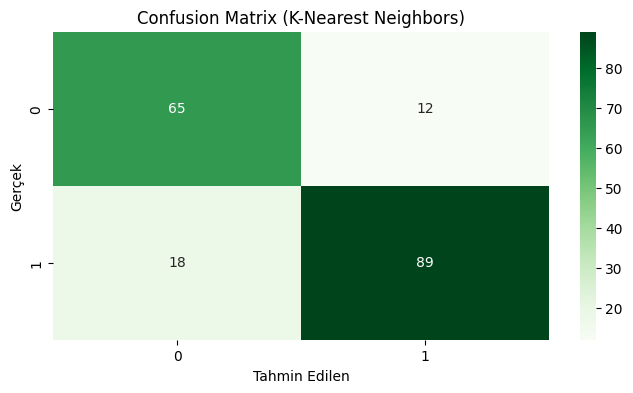

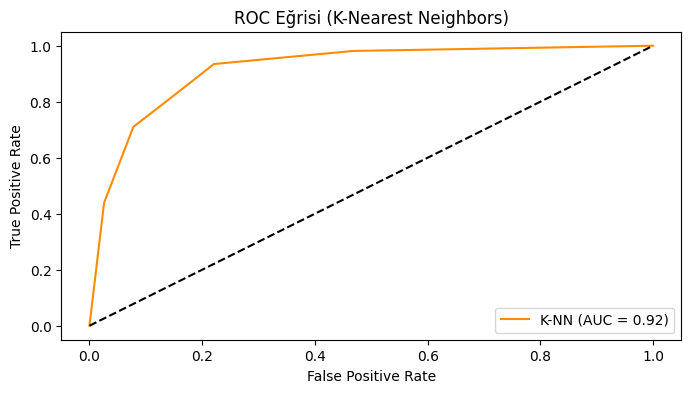


ROC AUC: 0.9169
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



In [37]:
# Modeli eÄŸitmek, tahmin yapmak, deÄŸerlendirmek (K-Nearest Neighbors)

# Modeli EÄŸitme
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = knn_model.predict(X_test)

# DeÄŸerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred, zero_division=True)
reports.append(classification_report(y_test, y_pred, zero_division=True,output_dict=True))
y_proba = knn_model.predict_proba(X_test)[:, 1]  # Pozitif sÄ±nÄ±fÄ±n olasÄ±lÄ±klarÄ±
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
rocScore = roc_auc_score(y_test, y_proba)

# Confusion Matrix Ã‡izme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (K-Nearest Neighbors)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("GerÃ§ek")
plt.show()

# ROC EÄŸrisini GÃ¶rselleÅŸtirme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'K-NN (AUC = {rocScore:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC EÄŸrisi (K-Nearest Neighbors)')
plt.legend()
plt.show()

print(f"\nROC AUC: {rocScore:.4f}")

# Raporu GÃ¶sterme
print(classReport)

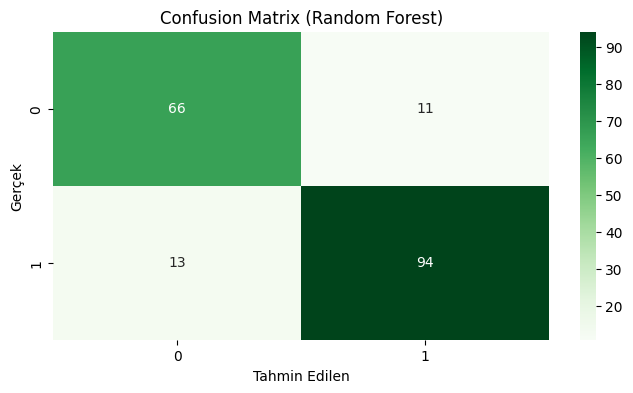

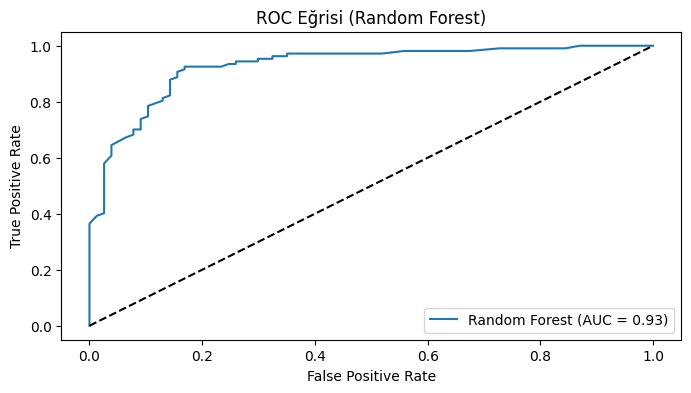

ROC AUC: 0.9274


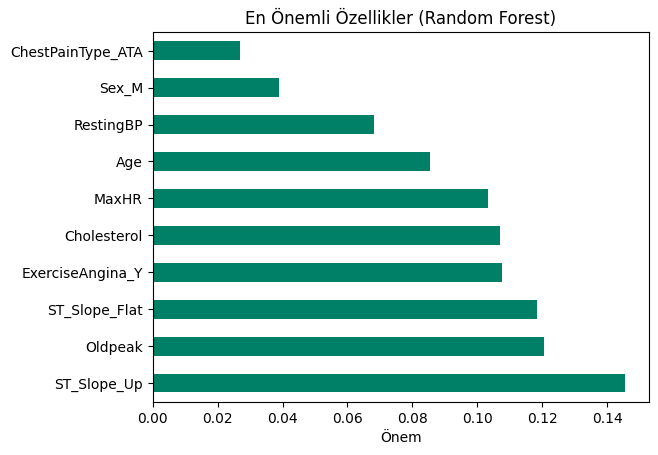

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [38]:
# Modeli eÄŸitmek, tahmin yapmak, deÄŸerlendirmek (Random Forest)

# Modeli EÄŸitme
rndF_model = RandomForestClassifier()
rndF_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = rndF_model.predict(X_test)

# DeÄŸerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)
reports.append(classification_report(y_test, y_pred,output_dict=True))
y_pred_prob = rndF_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
rocScore = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix Ã‡izme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("GerÃ§ek")
plt.show()

# ROC EÄŸrisini Ã‡izme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {rocScore:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC EÄŸrisi (Random Forest)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}")

# En Ã–nemli Ã–zellikleri Belirtme
importances = rndF_model.feature_importances_
features = X.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
feat_importance.plot(kind='barh',cmap="summer")
plt.title(f"En Ã–nemli Ã–zellikler (Random Forest)")
plt.xlabel("Ã–nem")
plt.show()

#Raporu GÃ¶sterme
print(classReport)

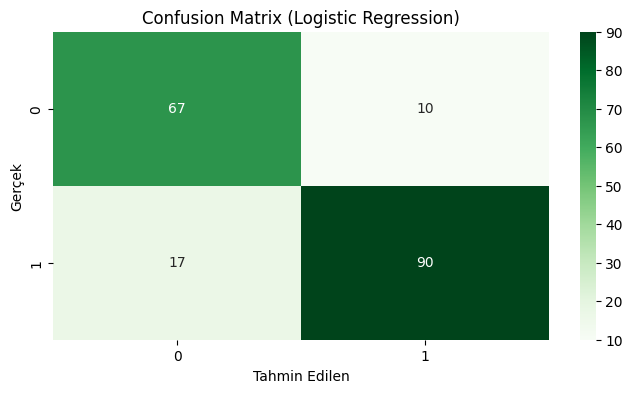

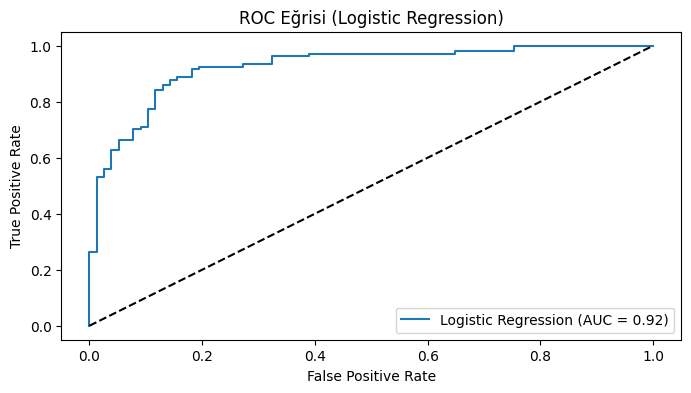

ROC AUC: 0.9241
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [39]:
# Modeli eÄŸitmek, tahmin yapmak, deÄŸerlendirmek (Logistic Regression)

# Modeli EÄŸitme
log_model = LogisticRegression(max_iter=8500,solver="saga",fit_intercept=True)
# model.n_iter_ ile kontrol yaptÄ±k 7930 Ã§Ä±kÄ±yor %10da pay verdik o yÃ¼zden 8500 iter yaptÄ±k
# solver = "saga" ise saga daha bÃ¼yÃ¼k veri setlerinde olduÄŸu iÃ§in
log_model.fit(X_train, y_train)

# Test Verisinde Tahmin Yapma
y_pred = log_model.predict(X_test)

# DeÄŸerlendirme
confusionMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred,zero_division=True)
reports.append(classification_report(y_test, y_pred,zero_division=True,output_dict=True))
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
rocScore = roc_auc_score(y_test, y_pred_prob)

# Confusion Matrix Ã‡izme
plt.figure(figsize=(8,4))
sns.heatmap(confusionMatrix,annot=True,fmt="d",cmap="Greens")
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("GerÃ§ek")
plt.show()

# ROC EÄŸrisini Ã‡izme
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {rocScore:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC EÄŸrisi (Logistic Regression)')
plt.legend()
plt.show()

print(f"ROC AUC: {rocScore:.4f}")

#Raporu GÃ¶sterme
print(classReport)

In [40]:
def predict_attrition(model, input_df, expected_columns, scaler, scaled_columns):
    input_encoded = pd.get_dummies(input_df)

    for col in expected_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    input_encoded = input_encoded[expected_columns]

    for col in scaled_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    to_scale = input_encoded[scaled_columns]

    if to_scale.shape[1] != len(scaler.mean_):
        raise ValueError(f"Scaler {len(scaler.mean_)} Ã¶zellik bekliyor ama {to_scale.shape[1]} Ã¶zellik geldi.\n"
                         f"scaled_columns: {scaled_columns}\nto_scale.columns: {to_scale.columns.tolist()}")

    scaled_array = scaler.transform(to_scale)
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_columns, index=input_encoded.index)

    input_encoded[scaled_columns] = scaled_df

    input_encoded = input_encoded.astype(float)

    prob = model.predict_proba(input_encoded)[0][1]
    prediction = model.predict(input_encoded)[0]
    result = "Kalp hastalÄ±ÄŸÄ± VAR" if prediction == 1 else "Kalp hastalÄ±ÄŸÄ± YOK"
    return result, prob

# scaled_columns, X'in iÃ§inden gelen sayÄ±sal sÃ¼tunlara gÃ¶re belirlenmeli:
scaled_columns = list(X.columns)

# Modelleri tanÄ±mla
models = [xgb_model, svc_model, decT_model, knn_model, rndF_model, log_model]
model_names = ['XGBoost', 'SVC', 'Decision Tree', 'KNN', 'Random Forest', 'Logistic Regression']

# Ã–rnek kiÅŸi
heart_input = pd.DataFrame([{
    'Age': 60,
    'Sex': 'M',
    'ChestPainType': 'ASY',
    'RestingBP': 140,
    'Cholesterol': 200,
    'FastingBS': 0,
    'RestingECG': 'Normal',
    'MaxHR': 150,
    'ExerciseAngina': 'Y',
    'Oldpeak': 1.5,
    'ST_Slope': 'Flat'
}])



print("ðŸ©º Tahmin SonuÃ§larÄ±:\n")
for name, model in zip(model_names, models):
    result, prob = predict_attrition(model, heart_input, X.columns, scaler, scaled_columns)
    print(f"{name} âž¤ SonuÃ§: {result} â€” OlasÄ±lÄ±k: %.2f" % (prob * 100) + "%\n")




ðŸ©º Tahmin SonuÃ§larÄ±:

XGBoost âž¤ SonuÃ§: Kalp hastalÄ±ÄŸÄ± VAR â€” OlasÄ±lÄ±k: 99.31%

SVC âž¤ SonuÃ§: Kalp hastalÄ±ÄŸÄ± VAR â€” OlasÄ±lÄ±k: 73.31%

Decision Tree âž¤ SonuÃ§: Kalp hastalÄ±ÄŸÄ± YOK â€” OlasÄ±lÄ±k: 28.57%

KNN âž¤ SonuÃ§: Kalp hastalÄ±ÄŸÄ± VAR â€” OlasÄ±lÄ±k: 60.00%

Random Forest âž¤ SonuÃ§: Kalp hastalÄ±ÄŸÄ± VAR â€” OlasÄ±lÄ±k: 67.00%

Logistic Regression âž¤ SonuÃ§: Kalp hastalÄ±ÄŸÄ± YOK â€” OlasÄ±lÄ±k: 0.00%



In [41]:
# TÃ¼m modellerin sÄ±nÄ±flandÄ±rma raporlarÄ±nÄ± tutmak iÃ§in boÅŸ bir liste oluÅŸturuyoruz
processed_reports = []
# Her model ve ona karÅŸÄ±lÄ±k gelen classification_report Ã§Ä±ktÄ±sÄ±nÄ± eÅŸleÅŸtirerek dÃ¶nÃ¼yoruz
for model_name, report in zip(models, reports):
    # Bu modelin sonuÃ§larÄ±nÄ± tabloya Ã§eviriyoruz
    df_temp = pd.DataFrame(report).transpose().reset_index()
    # SÃ¼tun isimlerini dÃ¼zenle
    df_temp.columns = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support'] 
    # Model ismini ekle
# TÃ¼m modellerin sÄ±nÄ±flandÄ±rma raporlarÄ±nÄ± tutmak iÃ§in boÅŸ bir liste oluÅŸturuyoruz
processed_reports = []
# Her model ve ona karÅŸÄ±lÄ±k gelen classification_report Ã§Ä±ktÄ±sÄ±nÄ± eÅŸleÅŸtirerek dÃ¶nÃ¼yoruz
for model_name, report in zip(models, reports):
    # Bu modelin sonuÃ§larÄ±nÄ± tabloya Ã§eviriyoruz
    df_temp = pd.DataFrame(report).transpose().reset_index()
    # SÃ¼tun isimlerini dÃ¼zenle
    df_temp.columns = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support'] 
    # Model ismini ekle


In [42]:
df_temp.insert(0, 'Model', model_name.__class__.__name__)
# HazÄ±rladÄ±ÄŸÄ±mÄ±z tabloyu genel listeye ekliyoruz
processed_reports.append(df_temp)
# TÃ¼m raporlarÄ± tek DataFrame'de birleÅŸtir
final_df_temp = pd.concat(processed_reports)
# Sonucu gÃ¶ster
final_df_temp


Model         Class  Precision    Recall  F1-Score     Support
0  LogisticRegression             0   0.797619  0.870130  0.832298   77.000000
1  LogisticRegression             1   0.900000  0.841121  0.869565  107.000000
2  LogisticRegression      accuracy   0.853261  0.853261  0.853261    0.853261
3  LogisticRegression     macro avg   0.848810  0.855626  0.850932  184.000000
4  LogisticRegression  weighted avg   0.857156  0.853261  0.853970  184.000000